--- 🐕 SOUNDHOUND DEEP DIVE (SOUN.US) ---


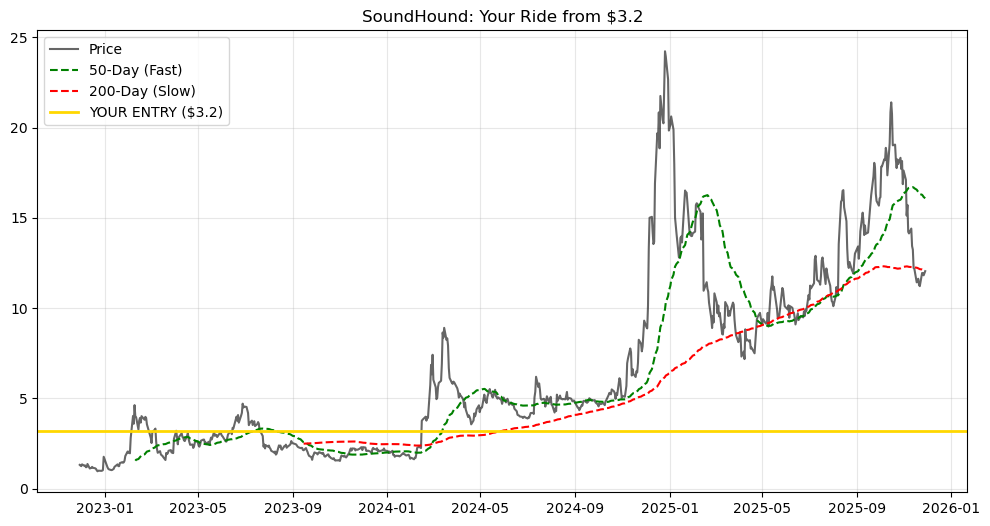

Current Price:   $12.05
50-Day MA:       $16.09
200-Day MA:      $12.11

--- 🩺 BISHOP'S DIAGNOSIS ---
🔴 CRITICAL: The stock is below BOTH averages.
   Action: The uptrend is broken. Proft protection mode.


In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd

# 1. SETUP
ticker = "SOUN.US" 
your_entry_price = 3.20 # Estimated from your "3 something" entry ~2 years ago
print(f"--- 🐕 SOUNDHOUND DEEP DIVE ({ticker}) ---")

# 2. GET DATA (3 Years to cover your entry)
end = datetime.datetime.now()
start = end - datetime.timedelta(days=365*3) 
# Use 'stooq' to bypass Yahoo blocks
df = web.DataReader(ticker, 'stooq', start, end).iloc[::-1]

# 3. CALCULATE TRENDS
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# 4. PLOT YOUR POSITION
plt.figure(figsize=(12, 6))

# The Price Line
plt.plot(df.index, df['Close'], label='Price', color='black', alpha=0.6)

# The Moving Averages (The Traffic Lights)
plt.plot(df.index, df['50_MA'], label='50-Day (Fast)', color='green', linestyle='--')
plt.plot(df.index, df['200_MA'], label='200-Day (Slow)', color='red', linestyle='--')

# Your Entry Point
plt.axhline(y=your_entry_price, color='gold', linestyle='-', linewidth=2, label=f'YOUR ENTRY (${your_entry_price})')

plt.title(f"SoundHound: Your Ride from ${your_entry_price}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. THE DIAGNOSIS
current_price = df['Close'].iloc[-1]
ma_50 = df['50_MA'].iloc[-1]
ma_200 = df['200_MA'].iloc[-1]

print(f"Current Price:   ${current_price:.2f}")
print(f"50-Day MA:       ${ma_50:.2f}")
print(f"200-Day MA:      ${ma_200:.2f}")

print("\n--- 🩺 BISHOP'S DIAGNOSIS ---")
if current_price < ma_50 and current_price < ma_200:
    print("🔴 CRITICAL: The stock is below BOTH averages.")
    print("   Action: The uptrend is broken. Proft protection mode.")
elif current_price < ma_50:
    print("⚠️ CAUTION: Price is below the 50-Day line.")
    print("   Action: Short-term weakness, but long-term trend is okay.")
else:
    print("🟢 HEALTHY: Price is above the 50-Day line.")
    print("   Action: The rocket is still flying.")